In [2]:
from typing import TypedDict


from langgraph.graph import StateGraph, START, END

In [5]:
class AgentState(TypedDict):
        number1:int
        number2:int
        operation1:str
        operation2:str
        number3:int
        number4:int
        result2:int
        result1:int



In [7]:
def adder1(state:AgentState)->AgentState:
    state['result1']=state['number1']+state['number2']
    return state


def subtrator1(state:AgentState)->AgentState:
    state['result1']=state['number1']-state['number2']
    return state

def adder2(state:AgentState)->AgentState:
    state['result2']=state['number3']+state['number4']
    return state


def subtractor2(state:AgentState)->AgentState:
    state['result2']=state['number3']-state['number4']
    return state



def choose_next_state1(state:AgentState)->str:
    if state['operation1']=='+':
        return 'add_op'
    elif state['operation1']=='-':
        return 'sub_op'
    else:
        return 'Incorrect operation'


def choose_next_state2(state:AgentState)->str:
    if state['operation2']=='-':
        return 'sub_op'
    elif state['operation2']=='+':
        return 'add_op'










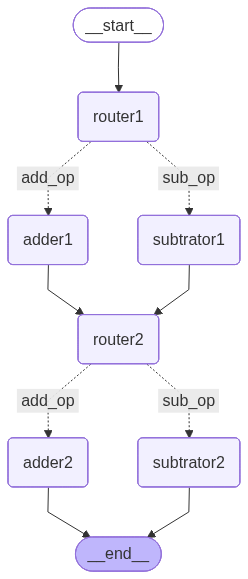

In [9]:
graph=StateGraph(AgentState)
graph.add_node("adder1",adder1)
graph.add_node("subtrator1",subtrator1)
graph.add_node("adder2",adder2)
graph.add_node("subtrator2",subtractor2)
graph.add_node("router1", lambda state:state)
graph.add_node("router2", lambda state:state)



graph.add_edge(START, "router1")
graph.add_conditional_edges(
    "router1",
    choose_next_state1,
    {
        "add_op":"adder1",
        "sub_op":"subtrator1"
    }
)


graph.add_edge("adder1", "router2")
graph.add_edge("subtrator1", "router2")
graph.add_conditional_edges(
    'router2',
    choose_next_state2,
    {
        'add_op':'adder2',
        'sub_op':'subtrator2'
    }
)
graph.add_edge("adder2",END)
graph.add_edge("subtrator2",END)


bot=graph.compile()
bot

In [10]:
input_state={
    'number1':1,
    'number2':2,
    'operation1':'-',
    'number3':3,
    'number4':4,
    'operation2':'+',
}


result=bot.invoke(input_state)
print(result)

{'number1': 1, 'number2': 2, 'operation1': '-', 'operation2': '+', 'number3': 3, 'number4': 4, 'result2': 7, 'result1': -1}
